In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1, "lines.markersize": 6,'figure.figsize':(11.7,8.27)})

In [5]:
data_path = '/users/krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
ls_obs_data = pd.read_csv(data_path+"combined_learning_sig_obs_data.csv")

In [6]:
ls_obs_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,cpp,ideal_B,target_B
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,599.0,0.670199,2.385458,1.0,0,36,0.305556,0.099471,0.000000,0.000000
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,598.0,0.259707,1.939019,1.0,1,36,0.305556,0.035079,-1.241007,0.000000
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,599.0,0.740615,2.498060,1.0,2,36,0.305556,0.023075,-0.595781,-1.241007
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,598.0,0.250242,1.742433,1.0,3,36,0.305556,0.019881,-0.306135,-0.595781
4,761,conflict,hc,4,4,0.0,0.0,1,0.656259,1.0,...,599.0,0.700190,2.350417,1.0,4,36,0.305556,0.018539,-0.139394,-0.306135


In [7]:
lv_rt = ls_obs_data.loc[ls_obs_data.condition  == 'lv',[ 'rt', 'ID']]
hv_rt = ls_obs_data.loc[ls_obs_data.condition  == 'hv', ['rt', 'ID']]

In [29]:
lc_rt = ls_obs_data.loc[ls_obs_data.condition  == 'lc',[ 'rt', 'ID']]
hc_rt = ls_obs_data.loc[ls_obs_data.condition  == 'hc', ['rt', 'ID']]

In [30]:
lv_rt_mean=lv_rt.groupby('ID')['rt'].mean()
hv_rt_mean=hv_rt.groupby('ID')['rt'].mean()

lc_rt_mean=lc_rt.groupby('ID')['rt'].mean()
hc_rt_mean=hc_rt.groupby('ID')['rt'].mean()

In [9]:
# def plot_unity(xdata, ydata, **kwargs):
#     mn = min(xdata.min(), ydata.min())
#     mx = max(xdata.max(), ydata.max())
#     points = np.linspace(mn, mx, 100)
#     plt.gca().plot(points, points, color='k', marker=None,
#             linestyle='--', linewidth=1.0)

In [86]:
xlim = [0.25, 0.55]
ylim = xlim

ticks = np.arange(xlim[0], xlim[1], 0.05)

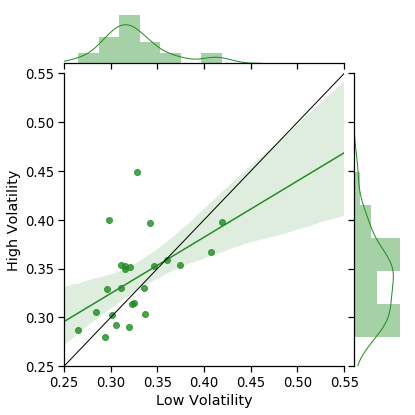

In [96]:
g = (sns.jointplot(x=lv_rt_mean, y=hv_rt_mean, kind="reg", color='forestgreen', xlim=xlim, ylim=ylim).set_axis_labels("Low Volatility", "High Volatility"))

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, '-k')   
g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)
plt.savefig("volatility_rts.pdf", dpi=600)


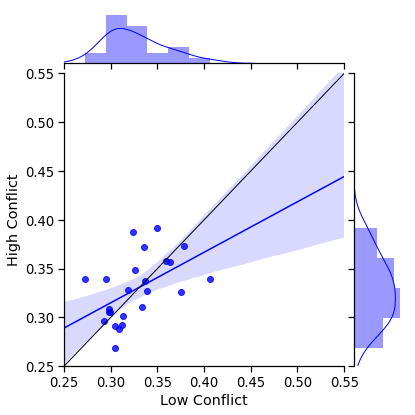

In [97]:
g = (sns.jointplot(x=lc_rt_mean, y=hc_rt_mean, kind="reg", color = 'blue',xlim=xlim, ylim=ylim).set_axis_labels("Low Conflict", "High Conflict"))

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, '-k')   

g.ax_joint.set_xticks(ticks)
g.ax_joint.set_yticks(ticks)

plt.savefig("conflict_rts.pdf", dpi=600)